# MCT     - Jaynil Patel   - Group 3 Geekathon

# Exploratory Data Analysis(EDA) for IPL Data

<hr style="border: 1px solid black;">

## 1. Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Data

In [2]:
dlv = pd.read_csv('deliveries.csv')

In [3]:
dlv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
mat = pd.read_csv('matches.csv')

In [5]:
mat.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
print(dlv.shape)
print(mat.shape)

(150460, 21)
(636, 18)


## 3. Data cleaning

In [7]:
dlv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

It is obvious to have these many null values in three columns: 'player_dismissed', 'dismissal_kind' and 'fielder'. <br>
These columns are important as well for the further analysis, hence we are not going to drop them.

In [8]:
mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

As the 'umpire3' column has no values, we are going to drop it. <br>
 
Apart from that, we can see there are very few missing values in this dataset. <br>
Moreover, all the missing values are of type 'object', hence we are going to drop them. <br>

In [9]:
mat.drop(['umpire3'], axis=1, inplace=True)

In [10]:
mat.dropna(inplace=True)

In [11]:
mat.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [12]:
dlv.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [13]:
mat.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
dtype: object

As we can see, the 'date' column in mat dataframe is not in correct format. <br>
Hence, converting it into the datetime format.  

In [14]:
mat['date'] = pd.to_datetime(mat['date'])

### Checking for the outliers in 'dlv' dataframe 

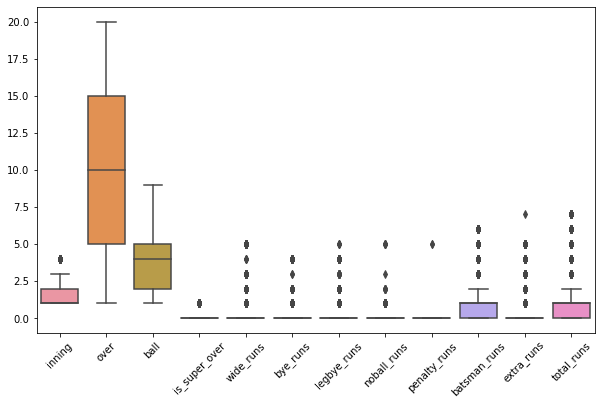

In [15]:
numerical_columns = dlv.select_dtypes(include=['number']).columns[1:]

plt.figure(figsize=(10, 6))
sns.boxplot(data=dlv[numerical_columns])
plt.xticks(rotation=45)
plt.show()

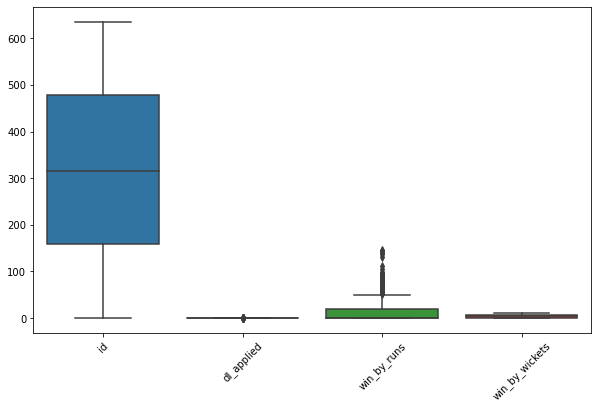

In [16]:
numerical_columns = mat.select_dtypes(include=['number']).columns[[0,2,3,4]]

plt.figure(figsize=(10, 6))
sns.boxplot(data=mat[numerical_columns])
plt.xticks(rotation=45)
plt.show()

As we can see there are very few of outliers, hence we are going to ignore them.

## 4. Data understanding

#### New shapes of the datasets after cleaning.

In [17]:
print(dlv.shape)
print(mat.shape)

(150460, 21)
(625, 17)


#### Summarizing the central tendency and dispersion of numerical features (e.g., mean, median, standard deviation).


In [18]:
dlv.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [19]:
mat.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,625.000000,625.000000,625.000000,625.000000,625.000000
mean,316.576000,2012.460800,0.025600,13.857600,3.395200
std,183.725158,2.782526,0.158065,24.069755,3.424877
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,158.000000,2010.000000,0.000000,0.000000,0.000000
50%,315.000000,2012.000000,0.000000,0.000000,4.000000
75%,478.000000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


### Checking the distribution of numerical columns using Histogram

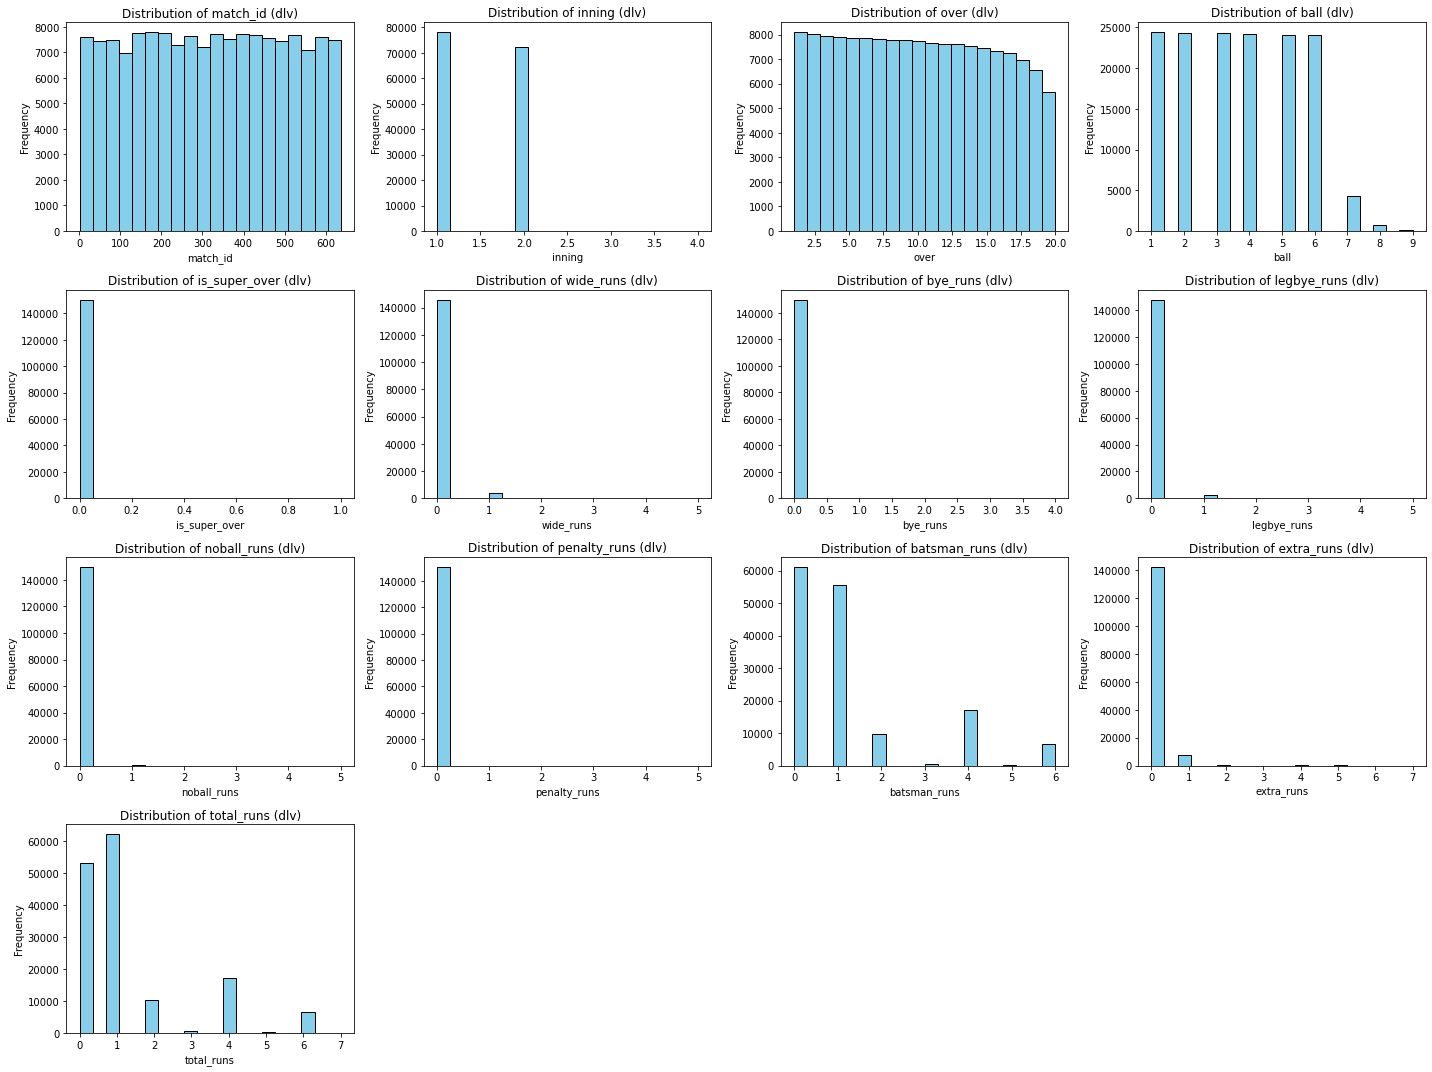

In [20]:
# Define numerical columns for each DataFrame
numerical_columns_dlv = ['match_id', 'inning', 'over', 'ball', 'is_super_over', 
                         'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 
                         'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']

numerical_columns_mat = ['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets']

# Create histograms for each numerical column in 'dlv'
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns_dlv, 1):
    plt.subplot(4, 4, i)  
    plt.hist(dlv[column], bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Distribution of {column} (dlv)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

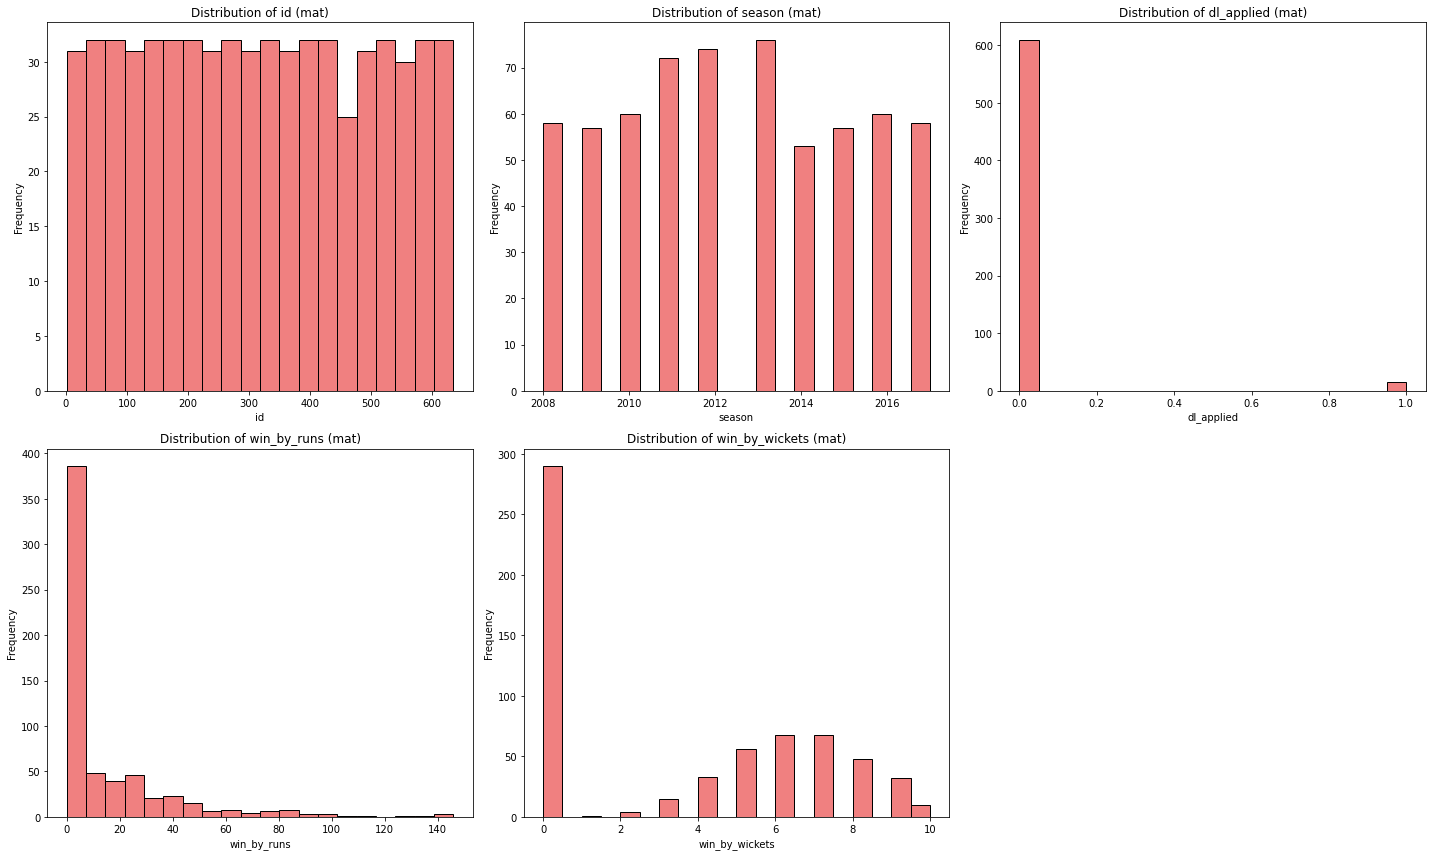

In [21]:
# Create histograms for each numerical column in 'mat'
plt.figure(figsize=(20, 12))
for i, column in enumerate(numerical_columns_mat, 1):
    plt.subplot(2, 3, i)
    plt.hist(mat[column], bins=20, edgecolor='black', color='lightcoral')
    plt.title(f'Distribution of {column} (mat)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

### Categorical column distribution in mat dataframe

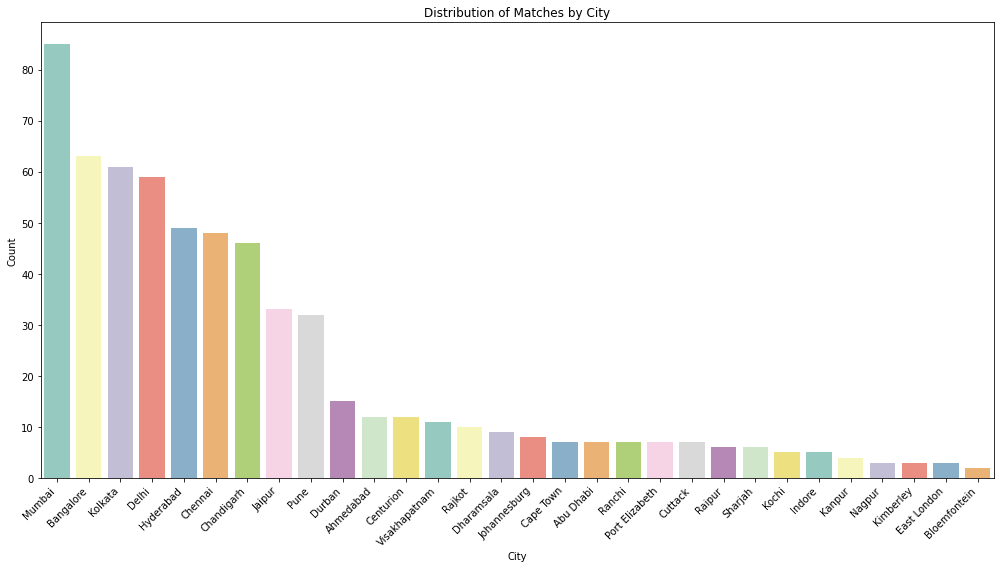

In [22]:
# Bar chart for the 'city' column in 'mat'
plt.figure(figsize=(14, 8))
sns.countplot(data=mat, x='city', palette='Set3', order=mat['city'].value_counts().index)
plt.title('Distribution of Matches by City')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 5. Data Exploration and Visualization:

1. Analyze the distribution of total runs across different overs. Are there specific phases of the innings (e.g., powerplay, middle overs, death overs) where scoring rates tend to be higher or lower?


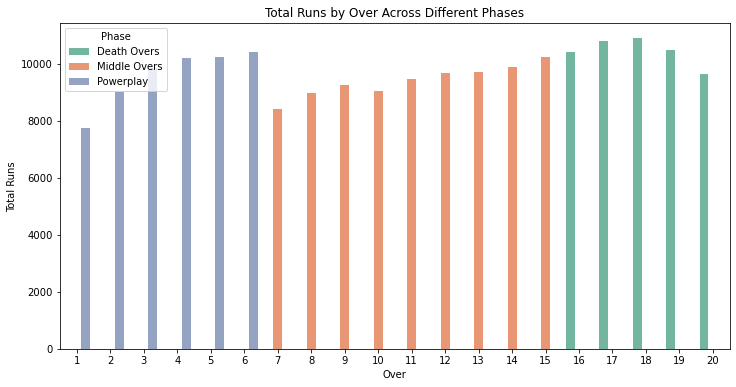

In [23]:
def categorize_phase(over):
    if 1 <= over <= 6:
        return 'Powerplay'
    elif 7 <= over <= 15:
        return 'Middle Overs'
    elif 16 <= over <= 20:
        return 'Death Overs'
    else:
        return 'Unknown'

dlv['phase'] = dlv['over'].apply(categorize_phase)

over_runs = dlv.groupby(['phase', 'over'])['total_runs'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=over_runs, x='over', y='total_runs', hue='phase', palette='Set2')
plt.title('Total Runs by Over Across Different Phases')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.legend(title='Phase')
plt.show()

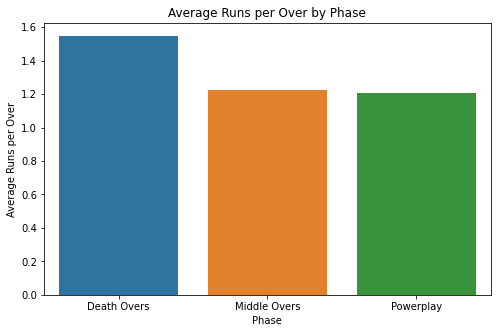

In [24]:
phase_analysis = dlv.groupby('phase')['total_runs'].mean().reset_index()
phase_analysis.columns = ['Phase', 'Average Runs per Over']

plt.figure(figsize=(8, 5))
sns.barplot(data=phase_analysis, x='Phase', y='Average Runs per Over')
plt.title('Average Runs per Over by Phase')
plt.xlabel('Phase')
plt.ylabel('Average Runs per Over')
plt.show()

2. Explore the relationship between the batsman_runs and the type of dismissal (dismissal_kind). Do certain dismissal types tend to occur after batsmen have scored a significant number of runs?

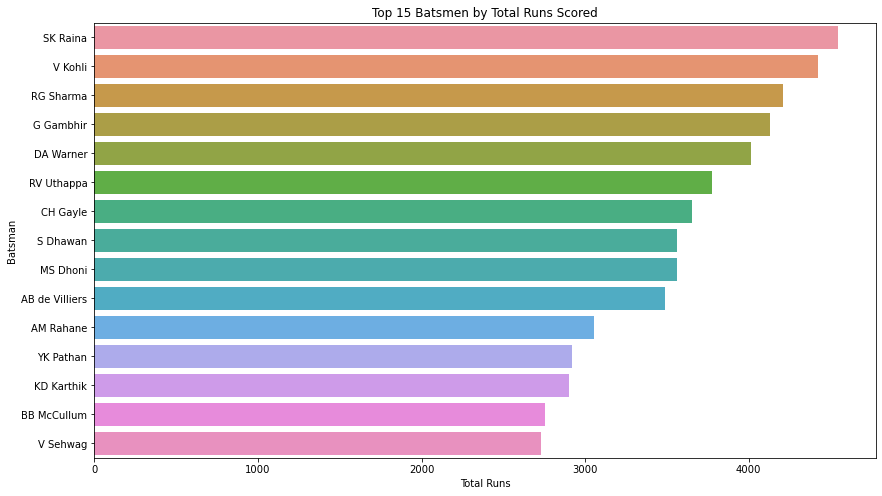

In [25]:
# Group by batsman to calculate total runs and number of deliveries faced
batsman_stats = dlv.groupby('batsman').agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()
batsman_stats.columns = ['Batsman', 'Total Runs', 'Balls Faced']

# Plot the total runs scored by each batsman
plt.figure(figsize=(14, 8))
top_batsmen = batsman_stats.sort_values(by='Total Runs', ascending=False).head(15)
sns.barplot(data=top_batsmen, x='Total Runs', y='Batsman')
plt.title('Top 15 Batsmen by Total Runs Scored')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

3. Compare the average number of total runs scored per over by different batting_teams. Do certain teams have consistently higher or lower scoring rates?

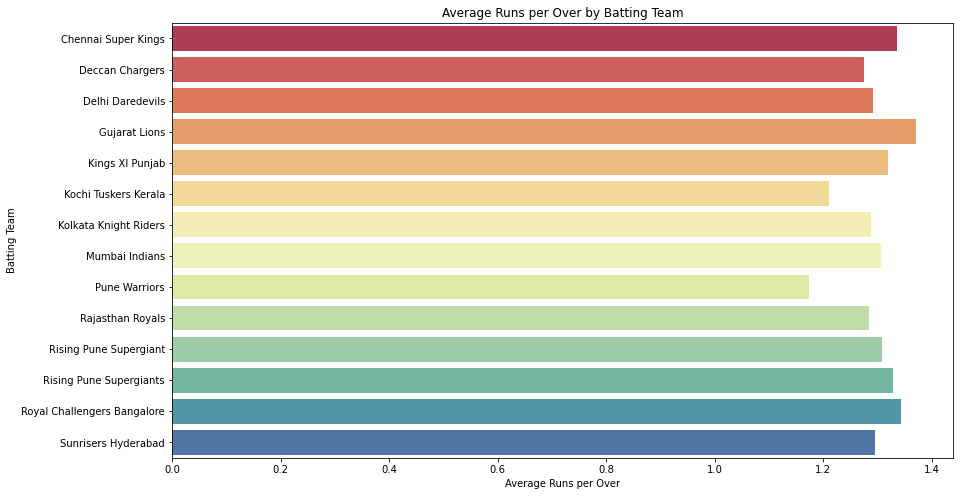

In [26]:
# Group by batting_team and over, then calculate the average runs per over
team_over_runs = dlv.groupby(['batting_team', 'over'])['total_runs'].mean().reset_index()

# Group by batting_team to get the average runs per over for each team
average_runs_per_team = team_over_runs.groupby('batting_team')['total_runs'].mean().reset_index()
average_runs_per_team.columns = ['Batting Team', 'Average Runs per Over']

# Plot the average runs per over for each team
plt.figure(figsize=(14, 8))
sns.barplot(data=average_runs_per_team, x='Average Runs per Over', y='Batting Team', palette='Spectral')
plt.title('Average Runs per Over by Batting Team')
plt.xlabel('Average Runs per Over')
plt.ylabel('Batting Team')
plt.show()

5. Explore the relationship between batsman_runs and the number of balls faced. Do certain batsmen score runs at a faster pace than others?


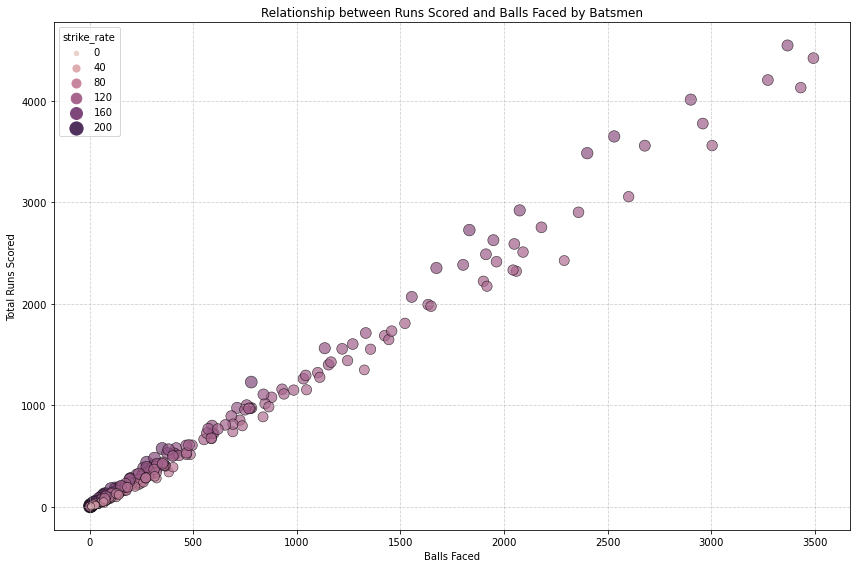

In [27]:
batsman_stats = dlv.groupby('batsman').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Calculate strike rate for each batsman
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Plot a scatter plot to visualize the relationship between balls faced and total runs
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=batsman_stats,
    x='balls_faced',
    y='total_runs',
    hue='strike_rate',
    size='strike_rate',
    sizes=(20, 200),
    alpha=0.7,
    edgecolor='k'
)

plt.title('Relationship between Runs Scored and Balls Faced by Batsmen')
plt.xlabel('Balls Faced')
plt.ylabel('Total Runs Scored')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

6. Analyze the distribution of dismissal_kind across different bowling_teams. Do certain teams have a higher proportion of specific dismissal types (e.g., more catches, more bowled dismissals)?


<Figure size 1008x576 with 0 Axes>

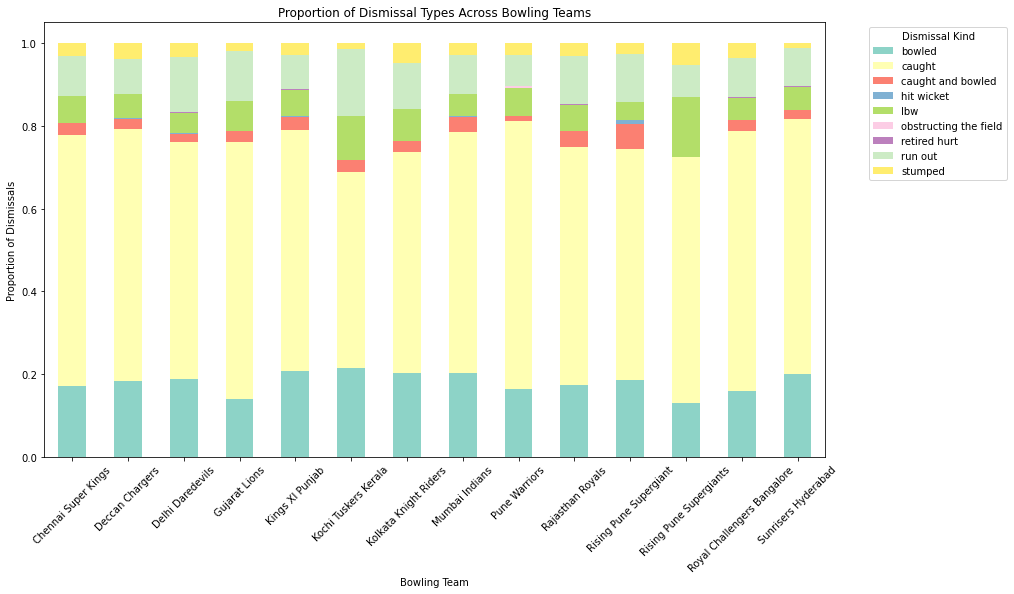

In [28]:
# Select relevant columns
bowling_dismissals = dlv[['bowling_team', 'dismissal_kind']]
# Group by bowling_team and dismissal_kind, and count the occurrences
dismissal_distribution = bowling_dismissals.groupby(['bowling_team', 'dismissal_kind']).size().reset_index(name='count')
# Calculate total dismissals for each bowling team
dismissal_distribution['total_dismissals'] = dismissal_distribution.groupby('bowling_team')['count'].transform('sum')

# Calculate the proportion of each dismissal_kind for each bowling team
dismissal_distribution['proportion'] = dismissal_distribution['count'] / dismissal_distribution['total_dismissals']
# Sort the data by bowling_team and proportion to easily identify the trends
dismissal_distribution_sorted = dismissal_distribution.sort_values(by=['bowling_team', 'proportion'], ascending=[True, False])


# Pivot the data to create a matrix for the bar plot
dismissal_pivot = dismissal_distribution.pivot_table(index='bowling_team', columns='dismissal_kind', values='proportion', aggfunc='sum', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
dismissal_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
plt.title('Proportion of Dismissal Types Across Bowling Teams')
plt.xlabel('Bowling Team')
plt.ylabel('Proportion of Dismissals')
plt.xticks(rotation=45)
plt.legend(title='Dismissal Kind', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

7. Explore the relationship between the over and the number of wickets (player_dismissed) taken. Are there specific overs where bowlers tend to be more successful in taking wickets?

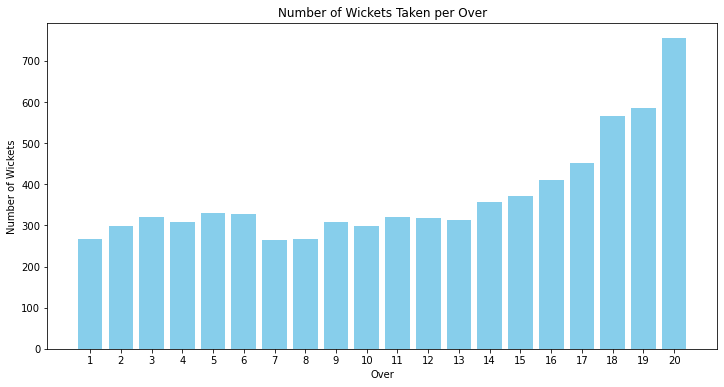

In [29]:
# Filter data where player_dismissed is not NaN (i.e., a dismissal occurred)
dismissals_data = dlv[dlv['player_dismissed'].notna()]

# Group by over and count the number of dismissals in each over
wickets_per_over = dismissals_data.groupby('over').size().reset_index(name='wickets')
import matplotlib.pyplot as plt

# Plotting the number of wickets per over
plt.figure(figsize=(12, 6))
plt.bar(wickets_per_over['over'], wickets_per_over['wickets'], color='skyblue')
plt.title('Number of Wickets Taken per Over')
plt.xlabel('Over')
plt.ylabel('Number of Wickets')
plt.xticks(range(1, 21))  
plt.show()

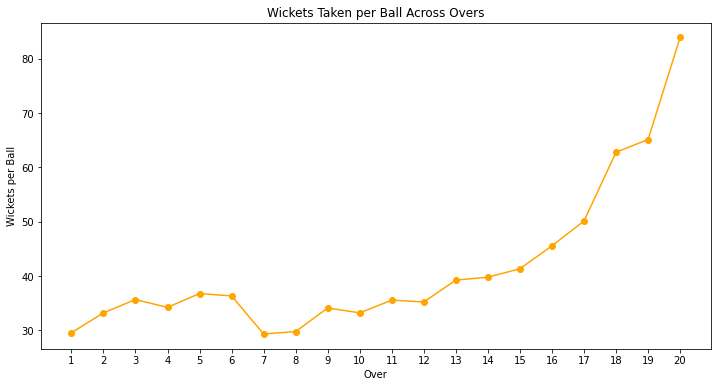

In [30]:
# Calculate the number of balls bowled in each over
balls_per_over = dlv.groupby('over')['ball'].max().reset_index(name='balls_bowled')

# Merge the wickets data with balls per over data
wickets_per_over = wickets_per_over.merge(balls_per_over, on='over')

# Calculate wickets per ball (normalize)
wickets_per_over['wickets_per_ball'] = wickets_per_over['wickets'] / wickets_per_over['balls_bowled']

# Plotting the normalized data
plt.figure(figsize=(12, 6))
plt.plot(wickets_per_over['over'], wickets_per_over['wickets_per_ball'], marker='o', color='orange')
plt.title('Wickets Taken per Ball Across Overs')
plt.xlabel('Over')
plt.ylabel('Wickets per Ball')
plt.xticks(range(1, 21))  
plt.show()

8. Analyze the performance of individual bowlers in terms of their economy rate (average runs conceded per over) against different batting_teams. Do certain bowlers have more success against specific teams?

### Note : It is not feasible to analyse all the bowlers together as mentioned in the question.

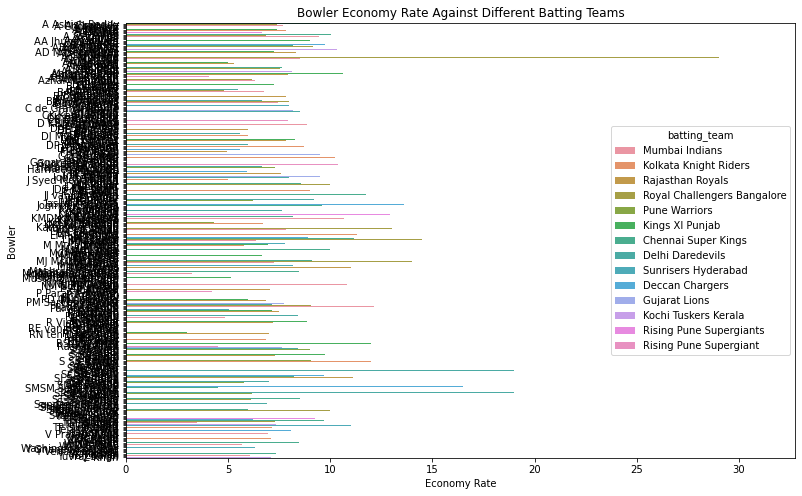

In [31]:
merged_df = dlv.merge(mat[['id', 'team1', 'team2']], left_on='match_id', right_on='id', how='left')


# Calculate total runs conceded and overs bowled by each bowler
bowler_performance = merged_df.groupby(['bowler', 'batting_team']).agg(
    total_runs_conceded=('total_runs', 'sum'),
    total_balls_bowled=('ball', 'count')
).reset_index()

# Calculate overs bowled (1 over = 6 balls)
bowler_performance['total_overs_bowled'] = bowler_performance['total_balls_bowled'] / 6

# Calculate economy rate for each bowler
bowler_performance['economy_rate'] = bowler_performance['total_runs_conceded'] / bowler_performance['total_overs_bowled']
# Sort by bowler and economy rate
bowler_performance_sorted = bowler_performance.sort_values(by=['bowler', 'economy_rate'])


# Plotting the economy rate of bowlers against different batting teams
plt.figure(figsize=(12, 8))
sns.barplot(x='economy_rate', y='bowler', hue='batting_team', data=bowler_performance_sorted)
plt.title('Bowler Economy Rate Against Different Batting Teams')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()

9. Explore the relationship between the type of dismissal_kind and the fielder involved. Do certain fielders specialize in particular types of dismissals (e.g., catches, run-outs)?

### Note : It is not feasible to analyse all the fielders together as mentioned in the question.

10. Compare the bowling strike rate (average balls bowled per wicket) of different bowlers across different seasons. Are there any noticeable trends or changes in bowling effectiveness over time?


### Note: It is not feasible to analyse all the bowlers together as mentioned in the question.

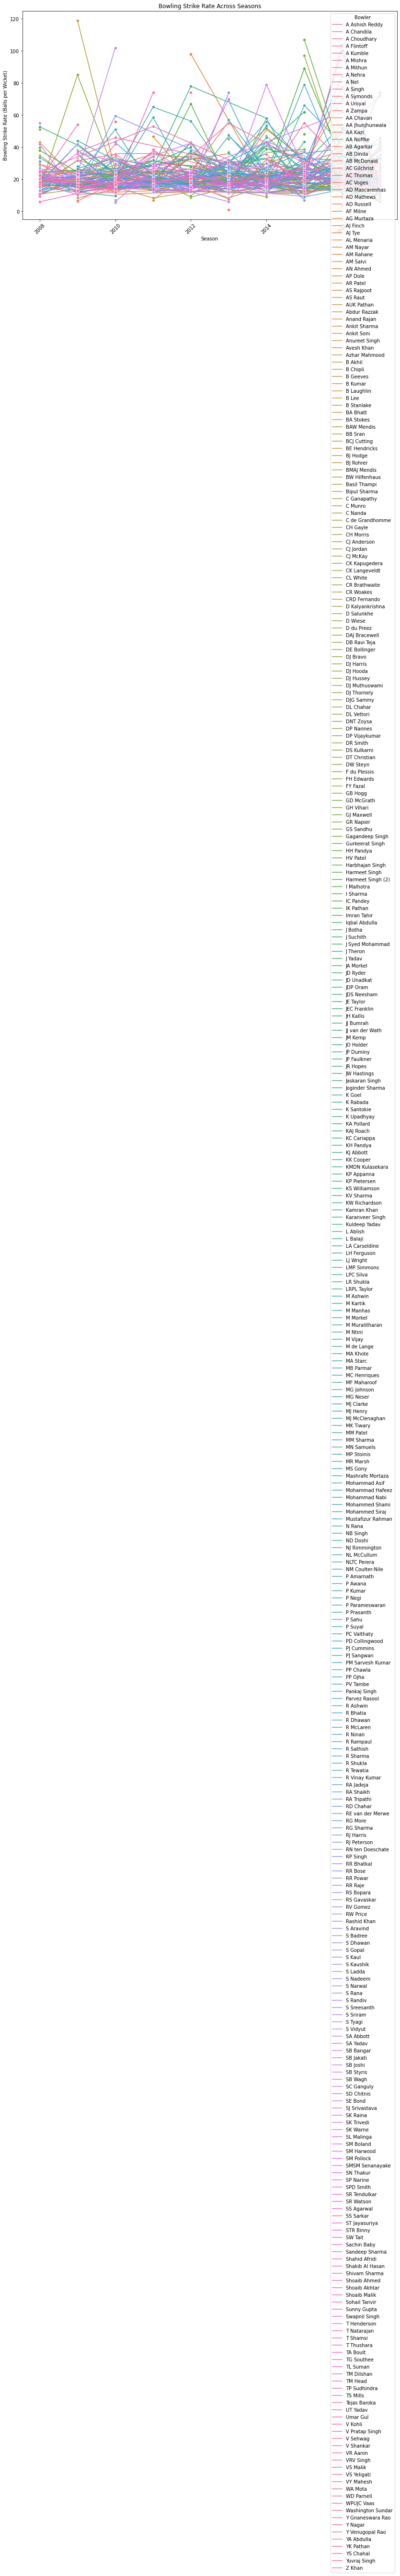

In [32]:
merged_df = dlv.merge(mat[['id', 'season']], left_on='match_id', right_on='id', how='left')
# Filter the dismissals that represent wickets
wicket_types = ['bowled', 'caught', 'lbw', 'run out', 'stumped', 'caught and bowled']

# Filter the data to only include deliveries that resulted in a wicket
wickets_df = merged_df[merged_df['dismissal_kind'].isin(wicket_types)]

# Group by bowler and season, and calculate total balls bowled and total wickets
bowler_performance = merged_df.groupby(['bowler', 'season']).agg(
    total_balls_bowled=('ball', 'count'),
    total_wickets=('dismissal_kind', lambda x: (x.isin(wicket_types)).sum())
).reset_index()
# Calculate the bowling strike rate
bowler_performance['bowling_strike_rate'] = bowler_performance['total_balls_bowled'] / bowler_performance['total_wickets']
# Sort by bowler and season to observe trends
bowler_performance_sorted = bowler_performance.sort_values(by=['bowler', 'season'])

plt.figure(figsize=(14, 8))
sns.lineplot(x='season', y='bowling_strike_rate', hue='bowler', data=bowler_performance_sorted, marker='o')
plt.title('Bowling Strike Rate Across Seasons')
plt.xlabel('Season')
plt.ylabel('Bowling Strike Rate (Balls per Wicket)')
plt.xticks(rotation=45)
plt.legend(title='Bowler')
plt.show()

11. Analyze the distribution of runs scored by batsman across different batting positions (e.g., opening batsmen, middle-order batsmen). Do certain batting positions tend to score more runs?




### No such column as batting position in the dataset!

12. Explore the relationship between the batsman and the bowler in terms of dismissal frequency. Do certain batsmen struggle against specific bowlers?


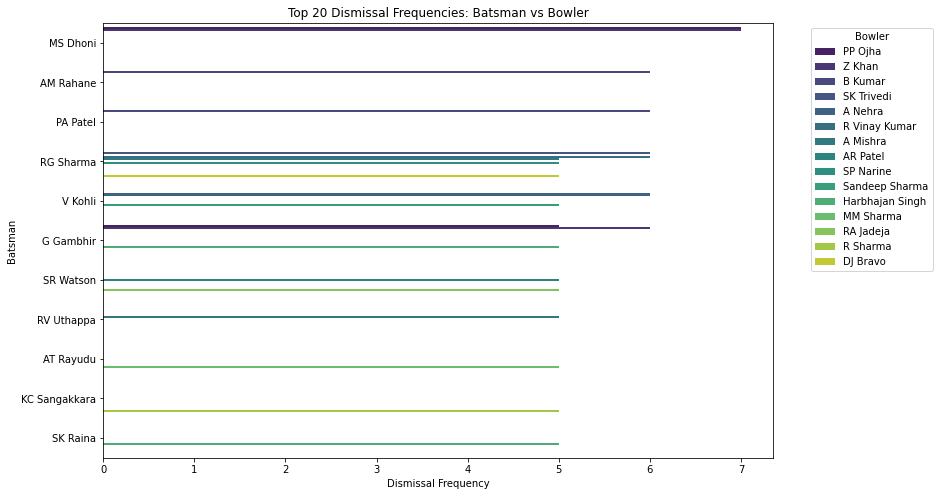

In [33]:
# Filter the dataset for batsman, bowler, and dismissal_kind
dismissal_data = dlv[['batsman', 'bowler', 'dismissal_kind']].dropna()

# Filter only the rows where the batsman is dismissed 
dismissed_data = dismissal_data[dismissal_data['dismissal_kind'] != '']

# Group by batsman and bowler to count the number of dismissals for each combination
dismissal_counts = dismissed_data.groupby(['batsman', 'bowler']).size().reset_index(name='dismissal_count')

# Sorting the data by dismissal count to identify the most frequent dismissals
dismissal_counts_sorted = dismissal_counts.sort_values(by='dismissal_count', ascending=False)

# Plotting the relationship between batsman and bowler in terms of dismissal frequency
plt.figure(figsize=(12, 8))
sns.barplot(x='dismissal_count', y='batsman', hue='bowler', data=dismissal_counts_sorted.head(20), palette='viridis')
plt.title('Top 20 Dismissal Frequencies: Batsman vs Bowler')
plt.xlabel('Dismissal Frequency')
plt.ylabel('Batsman')
plt.legend(title='Bowler', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

13. Analyze the runs scored by different pairs of batsman and non_striker to identify successful partnerships. Are there specific partnerships that consistently contribute significantly to the team's total score?


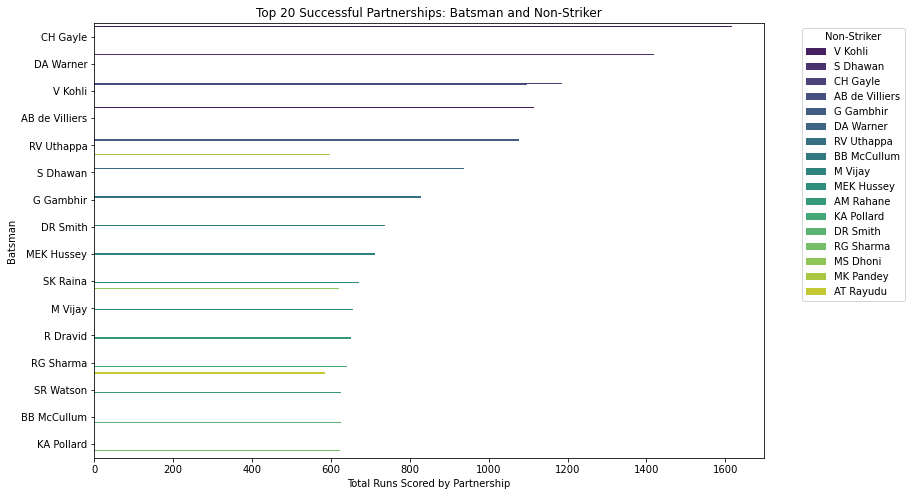

In [34]:
# Filter the dataset for batsman, non_striker, and total_runs
partnership_data = dlv[['batsman', 'non_striker', 'total_runs']]

# Group by batsman and non_striker to sum the total runs for each partnership
partnership_runs = partnership_data.groupby(['batsman', 'non_striker'])['total_runs'].sum().reset_index()

# Sort partnerships by total runs to identify the most successful ones
partnership_runs_sorted = partnership_runs.sort_values(by='total_runs', ascending=False)

# Plotting the top successful partnerships
plt.figure(figsize=(12, 8))
sns.barplot(x='total_runs', y='batsman', hue='non_striker', data=partnership_runs_sorted.head(20), palette='viridis')
plt.title('Top 20 Successful Partnerships: Batsman and Non-Striker')
plt.xlabel('Total Runs Scored by Partnership')
plt.ylabel('Batsman')
plt.legend(title='Non-Striker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

14. Compare the strike rate (runs scored per 100 balls) of individual batsmen against different bowling_teams. Do certain batsmen perform better against specific teams?

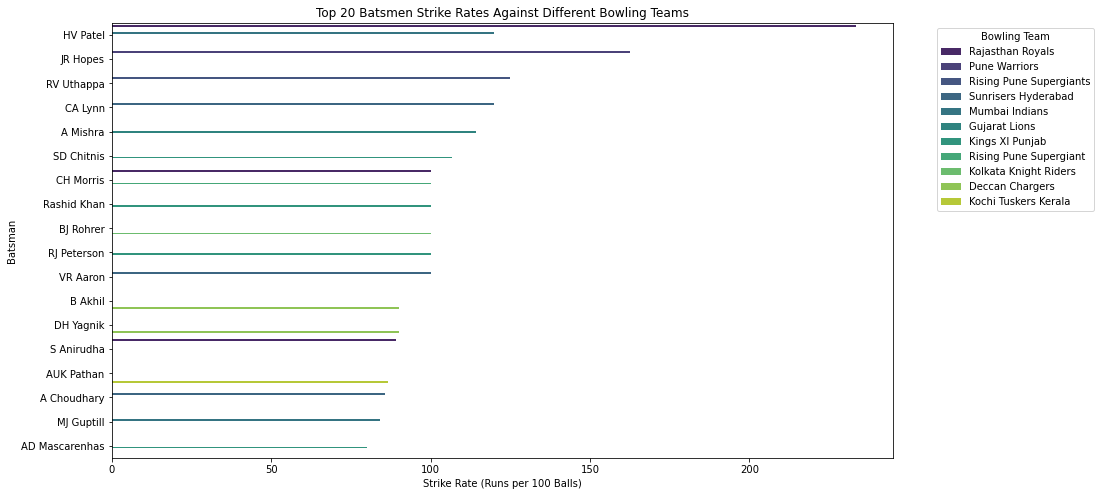

In [35]:
# Filter the dataset for batsman, bowling_team, total_runs, and balls faced
strike_rate_data = dlv[['batsman', 'bowling_team', 'total_runs', 'ball']]

# Group by batsman and bowling_team to calculate total runs and total balls faced
strike_rate_grouped = strike_rate_data.groupby(['batsman', 'bowling_team']).agg(
    total_runs=('total_runs', 'sum'),
    total_balls=('ball', 'sum')
).reset_index()

# Calculate the strike rate (runs per 100 balls) for each batsman against each bowling team
strike_rate_grouped['strike_rate'] = (strike_rate_grouped['total_runs'] / strike_rate_grouped['total_balls']) * 100

# Sort the data by strike rate to identify the highest performing batsmen
strike_rate_sorted = strike_rate_grouped.sort_values(by='strike_rate', ascending=False)

# Plotting the strike rate of batsmen against different bowling teams
plt.figure(figsize=(14, 8))
sns.barplot(x='strike_rate', y='batsman', hue='bowling_team', data=strike_rate_sorted.head(20), palette='viridis')
plt.title('Top 20 Batsmen Strike Rates Against Different Bowling Teams')
plt.xlabel('Strike Rate (Runs per 100 Balls)')
plt.ylabel('Batsman')
plt.legend(title='Bowling Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

15. Analyze the frequency of boundaries (fours and sixes) hit by different batsman. Do certain batsmen have a more aggressive batting style with a higher proportion of boundaries?


### Note : It is not feasible to analyse all the batsmen together as mentioned in the question.

C:\Users\jaynil patel\AppData\Local\Temp\ipykernel_5740\3080404838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_data['fours'] = boundary_data['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
C:\Users\jaynil patel\AppData\Local\Temp\ipykernel_5740\3080404838.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boundary_data['sixes'] = boundary_data['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)


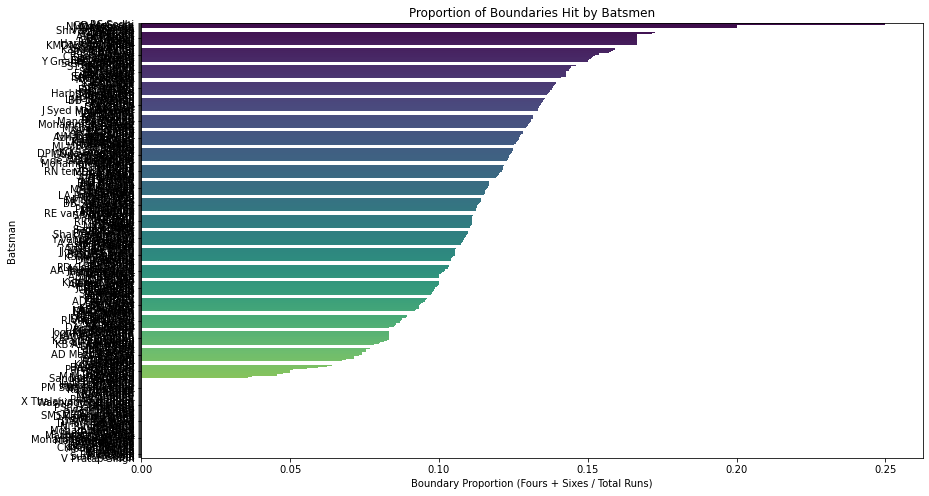

In [36]:
# Filter the dataset for batsman, batsman_runs, and total_runs
boundary_data = dlv[['batsman', 'batsman_runs', 'total_runs']]

# Identify fours and sixes
boundary_data['fours'] = boundary_data['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
boundary_data['sixes'] = boundary_data['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

# Group by batsman to calculate total fours, total sixes, and total runs for each batsman
boundary_counts = boundary_data.groupby('batsman').agg(
    total_fours=('fours', 'sum'),
    total_sixes=('sixes', 'sum'),
    total_runs=('total_runs', 'sum')
).reset_index()

# Calculate the proportion of boundaries (fours + sixes) to total runs
boundary_counts['boundary_proportion'] = (boundary_counts['total_fours'] + boundary_counts['total_sixes']) / boundary_counts['total_runs']

# Sort the data by the total number of boundaries and the boundary proportion
boundary_counts_sorted = boundary_counts.sort_values(by='boundary_proportion', ascending=False)

# Plotting the boundary proportion for each batsman
plt.figure(figsize=(14, 8))
sns.barplot(x='boundary_proportion', y='batsman', data=boundary_counts_sorted, palette='viridis')
plt.title('Proportion of Boundaries Hit by Batsmen')
plt.xlabel('Boundary Proportion (Fours + Sixes / Total Runs)')
plt.ylabel('Batsman')
plt.show()

16. Analyze the average total runs scored per match across different seasons. Has the overall scoring rate in IPL matches changed over time?


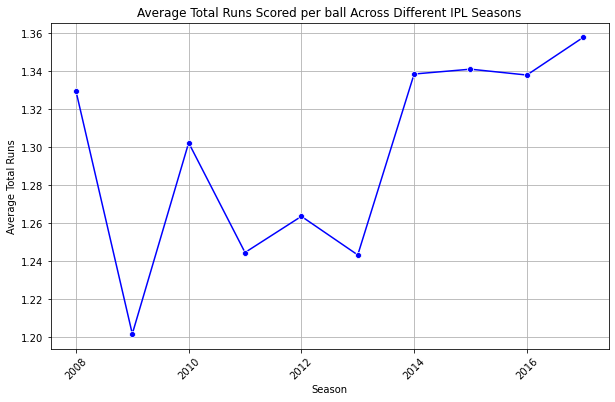

In [37]:
# Merge 'dlv' and 'mat' to get the season data
merged_data = pd.merge(dlv, mat[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Calculate total runs scored in each match
total_runs_per_match = merged_data.groupby('match_id')['total_runs'].sum().reset_index()

# Calculate the average total runs per match for each season
if 'season' in merged_data.columns:
    average_runs_per_season = merged_data.groupby('season')['total_runs'].sum() / merged_data['season'].value_counts().sort_index().values
    average_runs_per_season = average_runs_per_season.reset_index()
    average_runs_per_season.columns = ['season', 'average_runs']
    
    # Plot the trend of average total runs scored per match across different seasons
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='season', y='average_runs', data=average_runs_per_season, marker='o', color='b')
    plt.title('Average Total Runs Scored per ball Across Different IPL Seasons')
    plt.xlabel('Season')
    plt.ylabel('Average Total Runs')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

else:
    print("Season column not found in the merged dataset.")


17. Explore the trends in dismissal types (dismissal_kind) across different seasons. Are there any noticeable shifts in how batsmen are getting out over time?


<Figure size 864x504 with 0 Axes>

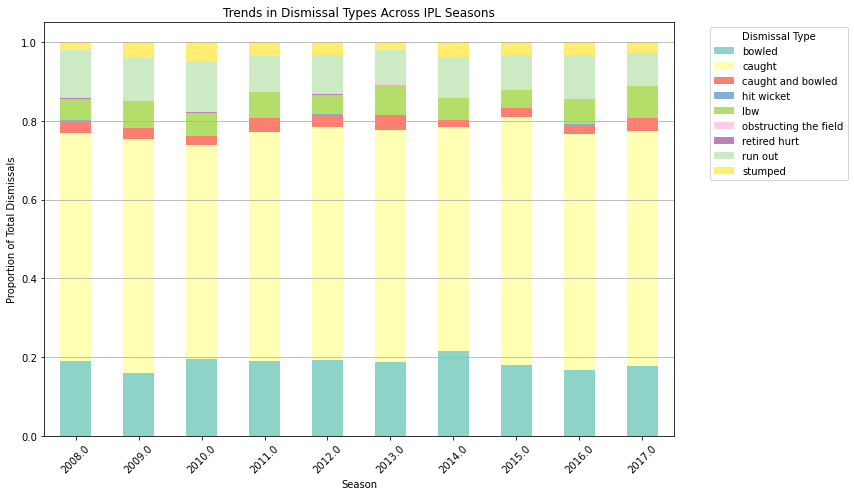

In [38]:
merged_data = pd.merge(dlv, mat[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Group the data by 'season' and 'dismissal_kind' to count the number of occurrences of each dismissal type
dismissals_by_season = merged_data.groupby(['season', 'dismissal_kind']).size().reset_index(name='count')

# Normalize the data by season (optional, for proportion view)
dismissals_by_season['total_dismissals'] = dismissals_by_season.groupby('season')['count'].transform('sum')
dismissals_by_season['dismissal_proportion'] = dismissals_by_season['count'] / dismissals_by_season['total_dismissals']

# Plot the trend of each dismissal type across seasons using a stacked bar chart
plt.figure(figsize=(12, 7))
sns.set_palette("Set3")  # Choose a distinct color palette
dismissals_pivot = dismissals_by_season.pivot_table(index='season', columns='dismissal_kind', values='dismissal_proportion', aggfunc='sum', fill_value=0)

# Plotting the trends
dismissals_pivot.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='Set3')

plt.title('Trends in Dismissal Types Across IPL Seasons')
plt.xlabel('Season')
plt.ylabel('Proportion of Total Dismissals')
plt.xticks(rotation=45)
plt.legend(title='Dismissal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

18. Analyze the impact of the inning (first or second) on the total runs scored. Do teams tend to score differently depending on whether they bat first or second?


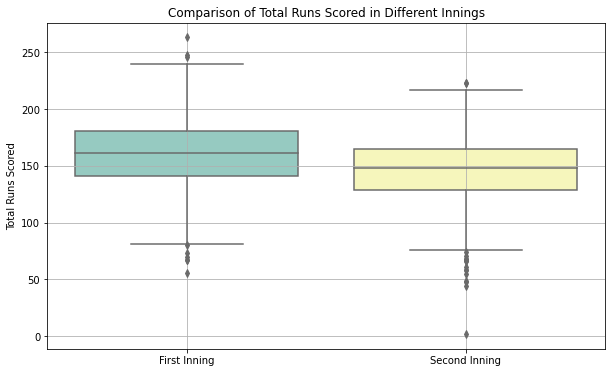

In [39]:
# Group the data by 'inning' and 'match_id' to calculate the total runs scored in each match for first and second innings
total_runs_by_inning = dlv.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

# Pivot the data so that we have one column for runs scored in each inning
runs_pivot = total_runs_by_inning.pivot(index='match_id', columns='inning', values='total_runs')

runs_pivot.columns = [f'inning_{i}_runs' for i in runs_pivot.columns]

if 'inning_1_runs' in runs_pivot.columns and 'inning_2_runs' in runs_pivot.columns:
    runs_pivot['runs_diff'] = runs_pivot['inning_1_runs'] - runs_pivot['inning_2_runs']
else:
    runs_pivot['runs_diff'] = None

# Plot the comparison of total runs scored in the innings
plt.figure(figsize=(10, 6))
sns.boxplot(data=runs_pivot[['inning_1_runs', 'inning_2_runs']] if 'inning_1_runs' in runs_pivot.columns and 'inning_2_runs' in runs_pivot.columns else runs_pivot)
plt.title('Comparison of Total Runs Scored in Different Innings')
plt.ylabel('Total Runs Scored')
plt.xticks([0, 1], ['First Inning', 'Second Inning'])
plt.grid(True)
plt.show()


19. Explore the relationship between the match id and the number of wide_runs bowled. Are there specific matches with an unusually high number of wides?

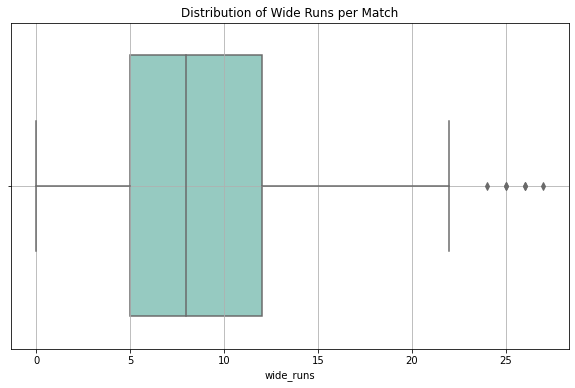

In [42]:
# Group the data by 'match_id' to calculate the total wide runs in each match
wide_runs_by_match = dlv.groupby('match_id')['wide_runs'].sum().reset_index()

# Calculate the mean and standard deviation of wide runs to identify potential outliers
mean_wide_runs = wide_runs_by_match['wide_runs'].mean()
std_wide_runs = wide_runs_by_match['wide_runs'].std()

# Set a threshold for identifying unusually high wide runs (e.g., more than 2 standard deviations from the mean)
threshold = mean_wide_runs + 2 * std_wide_runs

# Identify matches with unusually high wide runs
outlier_matches = wide_runs_by_match[wide_runs_by_match['wide_runs'] > threshold]

# Plot the distribution of wide runs per match
plt.figure(figsize=(10, 6))
sns.boxplot(data=wide_runs_by_match, x='wide_runs')
plt.title('Distribution of Wide Runs per Match')
plt.grid(True)
plt.show()

20. Analyze the distribution of noball_runs across different seasons. Has the frequency of no-balls changed over time?


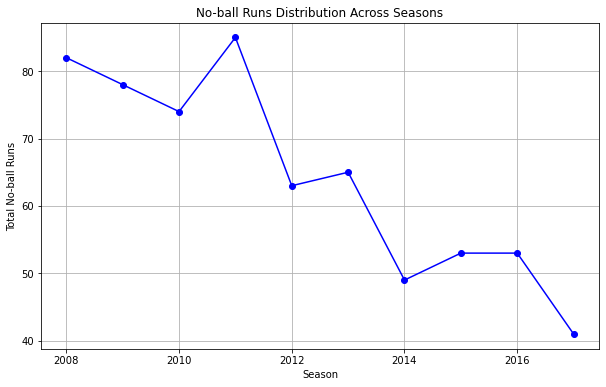

In [41]:
# Merge the two DataFrames on 'match_id'
merged_df = pd.merge(dlv, mat[['id', 'season']], left_on='match_id', right_on='id', how='inner')

# Group the merged data by 'season' to calculate the total noball_runs in each season
noball_runs_by_season = merged_df.groupby('season')['noball_runs'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(noball_runs_by_season['season'], noball_runs_by_season['noball_runs'], marker='o', linestyle='-', color='b')
plt.title('No-ball Runs Distribution Across Seasons')
plt.xlabel('Season')
plt.ylabel('Total No-ball Runs')
plt.grid(True)
plt.show()

## 6. Insights and Conclusion:

--> Mumbai city has hosted the maximum number of matches across all the seasons followed by Bangalore and Kolkata. <br>
--> The run-rate of an inning is highest during the Death-overs(16-20). <br>
--> Suresh Raina, Virat Kohli and Gautam Gambhir are the top-3 run-scorers. <br>
--> There is a positive linear relationship between batsman's runs and the number of balls faced. <br>
--> Caught(getting catch-out) is the most common way of dismissal and more than 50% players in each team get out that way.<br>
--> Getting bowled is the second most common way of dismissal for players in all the teams followd by run-out and LBW(Leg Before Wicket).<br>
--> Kochi Tuskers Kerala is the team where maximum number of players have got run-out and bowled-out. <br>
--> Death overs(16 to 20) are the time when bowlers tend to be more successful in taking wickets. Specially the last three overs have registered the maximum number of wickets. <br>
--> In the context of the initial phase of an inning, the last two overs of the powerplay(5 and 6) show a great chance of taking wickets. Hence, the captain should try to bring their best bowler in this overs. <br>
--> MS Dhoni has been dismissed maximum times by Prgyan Ojha. Rohit Sharma has struggled against the bowlers Ashish Nehra, Vinay Kumar, Axar Patel and Sunil Naraine. Virat Kohli has been dismissed maximum times by Bhuvneshvar Kumar followed by Sandeep Sharma. <br>
--> Chris gayle and Virat kohli have maximum runs(1600) in partnerships followed by David Warner and Shikhar Dhavan(1400 runs).<br>
--> HV Patel has the strike-rate of almost 250 against Rajasthan Royals. <br>
--> Average of the total runs scored per ball was lowest in season of 2009. Howerver, it has shown immense growth in the seasons after 2014. <br> 
--> Getting catch-out has been the most common way of dismissal in all the seasons, followed by getting bowled and run-out. However, there have not been any noticeable shifts in how batsmen are getting out over time. <br>
--> The scores of the first-innings tend to be higher compared to the second-innings. <br>
--> There have been some matches where the number of wide deliveries were more than 23. <br>
--> The no-ball runs were maximum in the season of 2011. However they have been reduced continuously after that season. 